# Notebook 11: Figuras y Tablas Finales

En este notebook se recopilan figuras y tablas generadas en los notebooks anteriores para su inclusión en la redacción de la memoria del TFM. 
Se guardan en la carpeta `results` para fácil acceso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

results_path = Path("../results")

# Carga de métricas y emisiones finales

In [2]:
metrics_file = results_path / "recommendation_metrics.csv"
metrics_df = pd.read_csv(metrics_file)

metrics_df["method"] = metrics_df["dataset"].apply(lambda x: "_".join(x.split("_")[:-1]))
metrics_df["fraction"] = metrics_df["dataset"].apply(lambda x: int(x.split("_")[-1]))
metrics_df.head()

,dataset,rmse,mae,precision_at_k,recall_at_k,coverage,diversity,novelty,emissions_kg,method,fraction
0,random_10,0.963246,0.764052,0.228265,0.835315,2690,0,0,0.000009,random,10
1,random_25,0.941447,0.745772,0.378964,0.839127,3107,0,0,0.000023,random,25
2,random_50,0.918194,0.724797,0.522936,0.769830,3320,0,0,0.000040,random,50
3,random_75,0.892747,0.702913,0.618779,0.694492,3403,0,0,0.000072,random,75
4,informed_users_10,0.861041,0.676441,0.854801,0.161023,3309,0,0,0.000036,informed_users,10


# Figuras finales: métricas de recomendación vs eficiencia

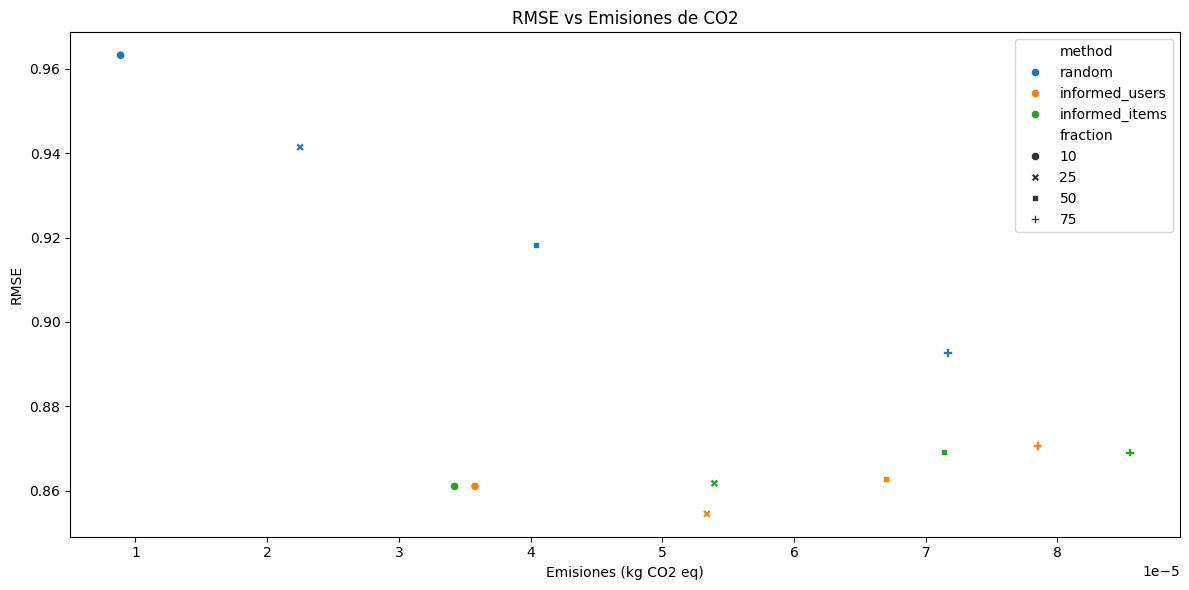

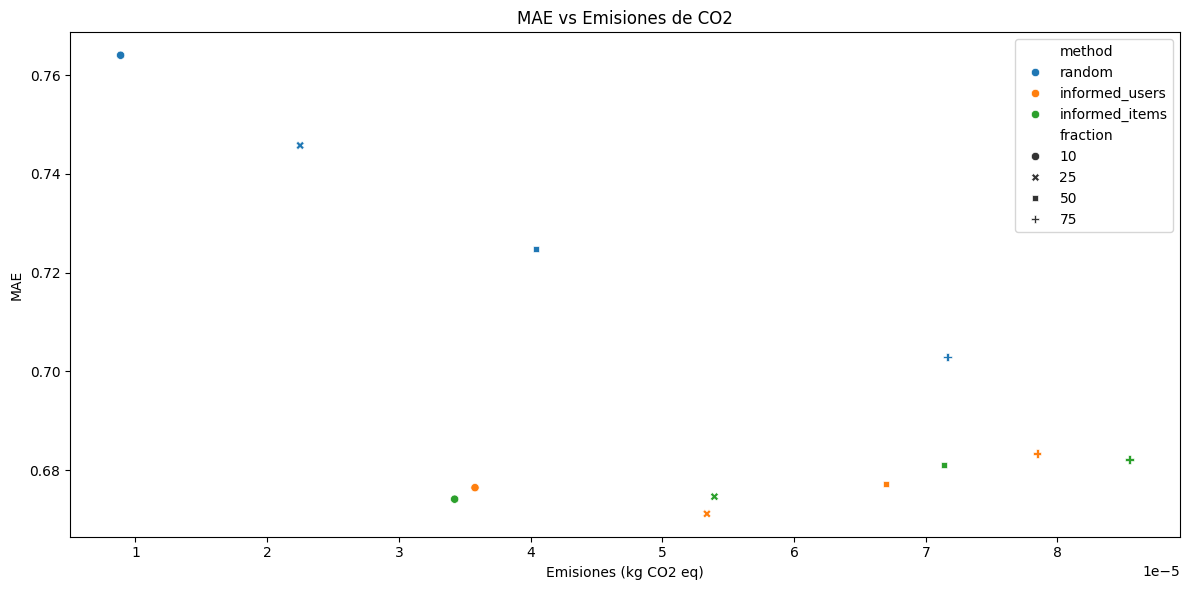

In [3]:
# RMSE vs Emisiones
plt.figure(figsize=(12,6))
sns.scatterplot(x='emissions_kg', y='rmse', hue='method', style='fraction', data=metrics_df)
plt.xlabel("Emisiones (kg CO2 eq)")
plt.ylabel("RMSE")
plt.title("RMSE vs Emisiones de CO2")
plt.tight_layout()
plt.savefig(results_path / "figure_rmse_vs_emissions.png")
plt.show()

# MAE vs Emisiones
plt.figure(figsize=(12,6))
sns.scatterplot(x='emissions_kg', y='mae', hue='method', style='fraction', data=metrics_df)
plt.xlabel("Emisiones (kg CO2 eq)")
plt.ylabel("MAE")
plt.title("MAE vs Emisiones de CO2")
plt.tight_layout()
plt.savefig(results_path / "figure_mae_vs_emissions.png")
plt.show()

# Tablas finales de métricas agregadas

In [4]:
agg_metrics = metrics_df.groupby(["method", "fraction"]).agg({
    "rmse": "mean",
    "mae": "mean",
    "precision_at_k": "mean",
    "recall_at_k": "mean",
    "coverage": "mean",
    "diversity": "mean",
    "novelty": "mean",
    "emissions_kg": "mean"
}).reset_index()

agg_metrics.to_csv(results_path / "summary_metrics.csv", index=False)
agg_metrics

,method,fraction,rmse,mae,precision_at_k,recall_at_k,coverage,diversity,novelty,emissions_kg
0,informed_items,10,0.861022,0.674104,0.584657,0.774081,370.0,0.0,0.0,0.000034
1,informed_items,25,0.861763,0.674610,0.649170,0.686108,926.0,0.0,0.0,0.000054
2,informed_items,50,0.869202,0.681037,0.674159,0.646692,1853.0,0.0,0.0,0.000071
3,informed_items,75,0.869098,0.682146,0.681796,0.635481,2779.0,0.0,0.0,0.000085
4,informed_users,10,0.861041,0.676441,0.854801,0.161023,3309.0,0.0,0.0,0.000036
5,informed_users,25,0.854523,0.671141,0.854371,0.231428,3394.0,0.0,0.0,0.000053
6,informed_users,50,0.862720,0.677257,0.830066,0.365951,3456.0,0.0,0.0,0.000067
7,informed_users,75,0.870710,0.683350,0.778079,0.522523,3466.0,0.0,0.0,0.000078
8,random,10,0.963246,0.764052,0.228265,0.835315,2690.0,0.0,0.0,0.000009
9,random,25,0.941447,0.745772,0.378964,0.839127,3107.0,0.0,0.0,0.000023


# Resumen

- Todas las figuras y tablas finales se han generado y guardado en la carpeta `results`.
- Los archivos pueden incorporarse directamente en el TFM.
- Permite presentar de forma clara la comparación entre rendimiento de recomendación y eficiencia energética para todos los modelos y submuestreos.